In [1]:
import pandas as pd
import sklearn as sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv('Hospital500.csv',sep=';')

In [4]:
X=data.iloc[:,0:25]
y=data.iloc[:,25]

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [6]:
from sklearn.preprocessing import StandardScaler   
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# MLP Regressor

In [7]:
from sklearn.neural_network import MLPRegressor

In [8]:
nn=MLPRegressor()

In [9]:
grid_param_nn = {  
    'hidden_layer_sizes': [50,100,200],
    'activation': ['relu','logistic'],
    'solver': ['adam','sgd']
}

In [10]:
gd_sr_nn = GridSearchCV(estimator=nn,  
                     param_grid=grid_param_nn,
                     cv=5,
                     n_jobs=-1)

In [11]:
gd_sr_nn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [50, 100, 200], 'activation': ['relu', 'logistic'], 'solver': ['adam', 'sgd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
best_parameters = gd_sr_nn.best_params_  
print(best_parameters)

{'activation': 'logistic', 'hidden_layer_sizes': 200, 'solver': 'adam'}


In [13]:
best_result = gd_sr_nn.best_score_  
print(best_result) 

0.8950861947491893


In [14]:
nn1=MLPRegressor(activation='logistic', hidden_layer_sizes=200, solver='adam')

In [15]:
nn2=nn1.fit(X_train,y_train)

In [16]:
y_nn=nn2.predict(X_train)

In [17]:
#y_pred

In [18]:
#y_train

In [19]:
n = {'nn': y_nn}
y_pred_nn = pd.DataFrame(n)
#y_pred_nn

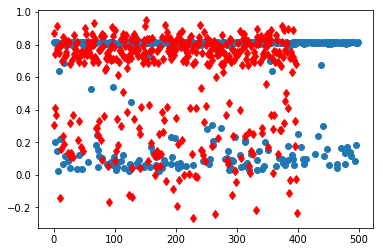

In [34]:
plt.plot(y_train,'o',y_pred_nn,'rd')
plt.show()

In [35]:
y2nn=nn2.predict(X_test)

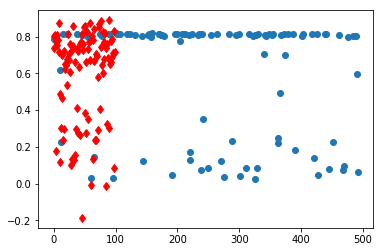

In [36]:
plt.plot(y_test,'o',y2nn,'rd')
plt.show()

# SVR

In [37]:
from sklearn.svm import SVR

In [38]:
svr = SVR()

In [39]:
grid_param_svr = {  
    'gamma':['scale','auto'],
    'epsilon': [0.1,0.2] ,  #con0.1 da linear y con 0.2 da sigmoid
    'kernel': ['rbf','linear','poly','sigmoid']
}

In [40]:
gd_sr_svr = GridSearchCV(estimator=svr,  
                     param_grid=grid_param_svr,
                     cv=5,
                     n_jobs=-1)

In [41]:
gd_sr_svr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.2], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
best_parameters = gd_sr_svr.best_params_  
print(best_parameters)

{'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [43]:
best_result = gd_sr_svr.best_score_  
print(best_result)

0.9654868663338221


In [44]:
svr1 = SVR(gamma='scale', epsilon=0.1, kernel='linear')

In [45]:
svr2=svr1.fit(X_train,y_train)

In [46]:
y_svr=svr2.predict(X_train)

In [47]:
#y_svr

In [48]:
#y_train

In [49]:
s = {'svr': y_svr}
y_pred_svr = pd.DataFrame(s)
#y_pred_svr

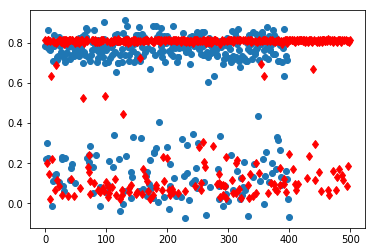

In [50]:
plt.plot(y_pred_svr,'o',y_train,'rd')
plt.show()

In [51]:
y2svr=svr2.predict(X_test)

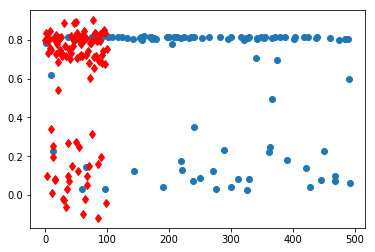

In [52]:
plt.plot(y_test,'o',y2svr,'rd')
plt.show()

# Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [69]:
X_train, y_train = make_regression(n_features=4, n_informative=25,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100,)

In [70]:
grid_param_rfr = {  
    'n_estimators': [50,100, 200],
    'random_state': [0,1,2],
    'max_depth': [2,3]
}

In [71]:
gd_sr_rfr = GridSearchCV(estimator=regr,  
                     param_grid=grid_param_rfr,
                     cv=5,
                     n_jobs=-1)

In [72]:
gd_sr_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200], 'random_state': [0, 1, 2], 'max_depth': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
best_parameters = gd_sr_rfr.best_params_  
print(best_parameters)

{'max_depth': 3, 'n_estimators': 100, 'random_state': 2}


In [74]:
best_result = gd_sr_rfr.best_score_  
print(best_result) 

0.7599547502517754


In [75]:
rfr1=RandomForestRegressor(max_depth=3, random_state=2,n_estimators=100,)

In [76]:
rfr2=rfr1.fit(X_train,y_train)

In [77]:
y_rfr=rfr2.predict(X_train)

In [78]:
#y_rfr

In [79]:
#y_train

In [80]:
r = {'nn': y_rfr}
y_pred_rfr = pd.DataFrame(r)
#y_pred_rfr

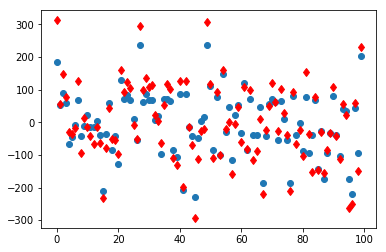

In [81]:
plt.plot(y_pred_rfr,'o',y_train,'rd')
plt.show()

In [82]:
y2rfr=rfr2.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 25 

In [268]:
#gd_sr_svr.cv_results_